### Выполнил: Салтыков Вадим Евгеньевич
### Группа: 18-ИВТ-3
### Вариант №12

####  Задание:
1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
6.	Заполните пропущенные значения в данных;
7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 

#### Набор данных: air_quality (3)

#### Классификаторы:
##### 1) Линейная регрессия без использования регуляризаторов
##### 2) Линейная регрессия, LASSO регуляризатор

-------------------------------------------------------------------------------------------------------------------------------

##### 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

0. Дата (ДД/ММ/ГГГГ)
1. Время (ЧЧ.ММ.СС)
2. Истинная среднечасовая концентрация СО в мг/м^3 (контрольный анализатор)
3. PT08.S1 (оксид олова) среднечасовая чувствительность датчика (номинально нацеленная на СО)
4. Истинная среднечасовая концентрация неметановых углеводородов в микрог / м ^ 3 (эталонный анализатор)
5. Истинная среднечасовая концентрация бензола в микрог/м^3 (контрольный анализатор)
6. PT08.S2 (диоксид титана) среднечасовой отклик сенсора (номинально для NMHC)
7. Истинная среднечасовая концентрация NOx в миллионных долях (контрольный анализатор)
8. PT08.S3 (оксид вольфрама) среднечасовой отклик датчика (номинально на NOx)
9. Истинная среднечасовая концентрация NO2 в микрог/м^3 (контрольный анализатор)
10. PT08.S4 (оксид вольфрама) среднечасовой отклик датчика (номинально на NO2)
11. PT08.S5 (оксид индия) среднечасовая чувствительность датчика (номинально O3)
12. Температура в °C
13. Относительная влажность (%)
14. AH Абсолютная влажность

In [68]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import linear_model

In [11]:
air = pd.read_csv("AirQualityUCI.csv", sep=';')
air

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10.03.2004,18.00.00,"2,6",1360,150,"11,9",1046,166,1056,113,1692,1268,"13,6","48,9","0,7578"
1,10.03.2004,19.00.00,2,1292,112,"9,4",955,103,1174,92,1559,972,"13,3","47,7","0,7255"
2,10.03.2004,20.00.00,"2,2",1402,88,9,939,131,1140,114,1555,1074,"11,9",54,"0,7502"
3,10.03.2004,21.00.00,"2,2",1376,80,"9,2",948,172,1092,122,1584,1203,11,60,"0,7867"
4,10.03.2004,22.00.00,"1,6",1272,51,"6,5",836,131,1205,116,1490,1110,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04.04.2005,10.00.00,"3,1",1314,-200,"13,5",1101,472,539,190,1374,1729,"21,9","29,3","0,7568"
9353,04.04.2005,11.00.00,"2,4",1163,-200,"11,4",1027,353,604,179,1264,1269,"24,3","23,7","0,7119"
9354,04.04.2005,12.00.00,"2,4",1142,-200,"12,4",1063,293,603,175,1241,1092,"26,9","18,3","0,6406"
9355,04.04.2005,13.00.00,"2,1",1003,-200,"9,5",961,235,702,156,1041,770,"28,3","13,5","0,5139"


##### 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [12]:
print("Размер набора данных до удаления дубликатов:\t", air.index.size)
air.drop_duplicates(keep = 'first', inplace = True)
print("Размер набора данных после удаления дубликатов:\t", air.index.size)

Размер набора данных до удаления дубликатов:	 9357
Размер набора данных после удаления дубликатов:	 9357


##### 3. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

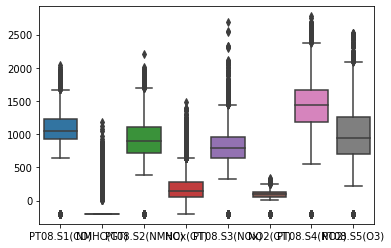

In [13]:
air.head()
numerical = [c for c in air.columns if air[c].dtype.name != 'object']
sns.boxplot(data = air[numerical])

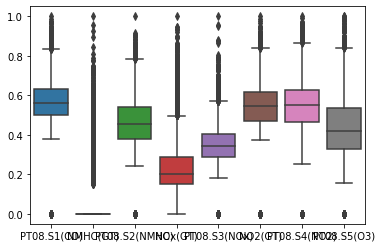

In [15]:
scaler = preprocessing.MinMaxScaler()
air[numerical] = scaler.fit_transform(air[numerical].values.astype(float))
sns.boxplot(data = air[numerical])

##### 4. Выполните замену категориальных признаков; выберите и обоснуйте способ замены

In [17]:
label_encoder = LabelEncoder()
ohe = OneHotEncoder(sparse = False)
for column in list(air):
    air[column] = pd.Series(label_encoder.fit_transform(air[column]))
air.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,114,18,30,666,136,39,623,163,700,108,986,977,66,375,1896
1,114,19,24,598,101,402,532,100,818,87,853,681,63,363,1727
2,114,20,26,708,78,398,516,128,784,109,849,783,49,426,1853
3,114,21,26,682,70,400,525,169,736,117,878,912,40,486,2056
4,114,22,16,578,41,372,413,128,848,111,784,819,42,482,2066


##### 5. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

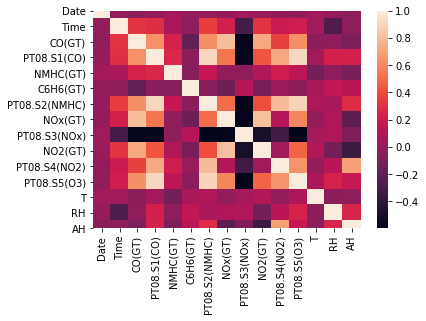

In [69]:
scaler = StandardScaler()
sns.heatmap(air.corr())

##### 6. Заполните пропущенные значения в данных

In [21]:
air.count()

Date             9357
Time             9357
CO(GT)           9357
PT08.S1(CO)      9357
NMHC(GT)         9357
C6H6(GT)         9357
PT08.S2(NMHC)    9357
NOx(GT)          9357
PT08.S3(NOx)     9357
NO2(GT)          9357
PT08.S4(NO2)     9357
PT08.S5(O3)      9357
T                9357
RH               9357
AH               9357
dtype: int64

Пропущенных данных нет

##### 7. Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.

In [22]:
air.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [24]:
X_data, Y_data = air.drop(columns="CO(GT)", axis=1).values, air["CO(GT)"].values
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=.3)

1) Линейная регрессия без использования регуляризаторов

In [38]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
pred_reg = reg.predict(X_test)

In [39]:
P, p_value_P = pearsonr(pred_reg, y_test)
print("Pearson correlation: ", P)
S, p_value_S = spearmanr(pred_reg, y_test)
print("Spearmen correlation: ", S)
print("P_VALUSE_P :", p_value_P)
print("P_VALUSE_S :", p_value_S)

Pearson correlation:  0.8820449043014456
Spearmen correlation:  0.8479267427391391
P_VALUSE_P : 0.0
P_VALUSE_S : 0.0


2) Линейная регрессия, LASSO регуляризатор

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

In [65]:
lasso = Lasso()
lasso_grid = GridSearchCV(lasso, {'alpha': np.arange(0.2, 0.5, 0.01)})
lasso_grid.fit(X_train, y_train)
best_alpha = lasso_grid.best_estimator_.alpha
print('best alpha:', best_alpha)

best alpha: 0.2


In [66]:
lasso = Lasso(alpha = best_alpha)
lasso.fit(X_train, y_train)
pred_reg = lasso.predict(X_test)

In [67]:
P, p_value_P = pearsonr(pred_reg, y_test)
print("Pearson correlation: ", P)
S, p_value_S = spearmanr(pred_reg, y_test)
print("Spearmen correlation: ", S)
print("P_VALUSE_P :", p_value_P)
print("P_VALUSE_S :", p_value_S)

Pearson correlation:  0.8820749286694145
Spearmen correlation:  0.8480054787212552
P_VALUSE_P : 0.0
P_VALUSE_S : 0.0
